In [1]:
import pandas as pd
import warnings 
# 用来忽略seaborn绘图库产生的warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 数据概览

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['target']=pd.Series(iris.target)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


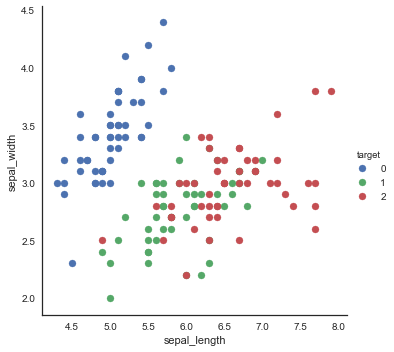

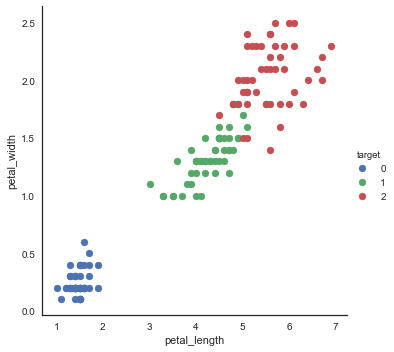

In [3]:
sns.FacetGrid(df, hue="target", size=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
sns.FacetGrid(df, hue="target", size=5).map(plt.scatter, "petal_length", "petal_width").add_legend()

## 模型训练

In [5]:
# 拆分数据
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['sepal_length','sepal_width']], df['target'], random_state=1)

# 训练
from sklearn import svm
model = svm.SVC()
model.fit(x_train,y_train) 

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
# 训练结果

# get support vectors
print(model.support_vectors_)

# get indices of support vectors
print(model.support_)

# get number of support vectors for each class
print(model.n_support_)

[[ 5.7  3.8]
 [ 4.8  3. ]
 [ 5.5  3.5]
 [ 4.8  3. ]
 [ 5.1  3.3]
 [ 5.7  4.4]
 [ 4.5  2.3]
 [ 4.9  3. ]
 [ 5.4  3.4]
 [ 5.   3. ]
 [ 6.5  2.8]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 6.   3.4]
 [ 5.7  3. ]
 [ 6.7  3.1]
 [ 5.7  2.8]
 [ 6.   2.2]
 [ 6.4  2.9]
 [ 5.   2.3]
 [ 6.   2.7]
 [ 5.8  2.7]
 [ 6.2  2.9]
 [ 6.3  2.3]
 [ 5.6  2.9]
 [ 5.8  2.7]
 [ 6.9  3.1]
 [ 6.8  2.8]
 [ 5.9  3.2]
 [ 5.6  3. ]
 [ 5.   2. ]
 [ 4.9  2.4]
 [ 5.9  3. ]
 [ 6.1  2.9]
 [ 6.7  3.1]
 [ 5.7  2.9]
 [ 6.2  2.2]
 [ 7.   3.2]
 [ 6.1  2.8]
 [ 5.7  2.6]
 [ 6.3  2.5]
 [ 6.7  2.5]
 [ 6.   2.2]
 [ 6.3  2.9]
 [ 7.7  2.6]
 [ 7.7  3.8]
 [ 6.4  2.8]
 [ 6.2  2.8]
 [ 5.7  2.5]
 [ 6.3  2.7]
 [ 6.5  3. ]
 [ 6.1  3. ]
 [ 6.5  3.2]
 [ 6.   3. ]
 [ 6.5  3. ]
 [ 6.3  3.3]
 [ 6.4  2.7]
 [ 5.9  3. ]
 [ 6.7  3. ]
 [ 6.2  3.4]
 [ 6.3  3.4]
 [ 5.6  2.8]
 [ 5.8  2.7]
 [ 6.5  3. ]
 [ 4.9  2.5]
 [ 6.4  3.2]
 [ 5.8  2.7]
 [ 6.1  2.6]
 [ 6.3  2.8]
 [ 6.4  3.1]]
[  8  10  13  25  51  62  64  90 101 102   0   6  11  19  21  31  32  36
  37  39  47  52

In [10]:
# 检查得分
model.score(x_test,y_test)

0.81578947368421051